Type your name here and any comment useful for the evaluation of your work<br>
Name 1: __Murshed SK__ <br>
Name 2: __Asad Munir__

# Partial Differential Equation Training

In [1]:
#Import the requied libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 1 Linear Convection

The 1-D Linear Convection equation is the simplest, most basic model for PDEs. Here it is:
$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x}=0$.
c is a velocity, whereas u can be any advected quantity. For example it can be the concentration of some polutant in a river flowing at speed c.


With given initial conditions (understood as a wave), the equation represents the propagation of that initial wave with speed c along the X axis
, without change of shape. Let the initial condition be $u(x,0)=u0(x)$
. Then the exact solution of the equation is $u(x,t)=u0(x−ct)$
(See lecture this morning).


We discretize this equation in both space and time, using the Forward Difference scheme for the time derivative and the Backward Difference scheme for the space derivative. Consider discretizing the spatial coordinate x  into points that we index from $i=0$ to $N$ , and stepping in discrete time intervals of size $dt$.




We use the following convention : $U^{n}_i$ is the amplitude of the wave at time $t=n \times dt$, and at $x=i \times dx$

How woud you approximate $\frac{\partial u}{\partial t}$ , using $U^{n}_i$, with a forward difference sheme ?

Answer:<br>
<div align="center">
$\frac{\partial U}{\partial t} \approx \frac{{U^{n+1}_i}-{U^{n}_i}}{dt}$
<div>

How woud you approximate $\frac{\partial u}{\partial x}$ , using $U^{n}_i$, with a backward difference sheme ?


Answer:<br>
<div align="center">
$\frac{\partial U}{\partial x} \approx \frac{{U^{n}_i}-{U^{n}_{i-1}}}{dx}$
</div>

Write the first order explicit integration scheme we will use, in function of $U^{n}_i$, c, dt, dx, $U^{n}_i$ and $U^{n}_{i-1}$

Answer:<br>
<div align = "center">
$U^{n+1}_i= U^{n}_i - (\frac{cdt}{dx})(U^{n}_i - U^{n}_{i-1})$
</div>

Now let's try implementing this in Python.

We want to define an evenly spaced grid of points within a  domain that is 2 units of length wide, i.e., 0<x_i<2. Variable $nx$ which will be the number of grid points we want and dx will be the distance between two adjacent grid points. we define the following values 

In [2]:
nx = 41  # This will be changed latter
dx = 2 / (nx-1) #dx is length of each grid step 
nt = 25    #nt is the number of timesteps we want to calculate
Delta_T=0.625 # time of integration
dt = Delta_T/(nt*1.0) #dt is length of each time step 
c = 1      #assume advection velocity  is c = 1

We also need to set up our initial conditions. The initial concentration u0
 is given as  u=2 in the interval 0.5≤x≤1 and u=1
 everywhere else in (0,2)  (i.e., a hat function). Build U

In [3]:
# Initial condition: hat function
x_hat = np.linspace(0,2,nx)
u_hat = np.ones(nx)  # Initialize u_hat to 1 everywhere
u_hat[(x_hat >= 0.5) & (x_hat <= 1)] = 2  # Set u_hat = 2 in the interval [0.5, 1]
u_hat

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

```plot, U, your initial concentration profile.```

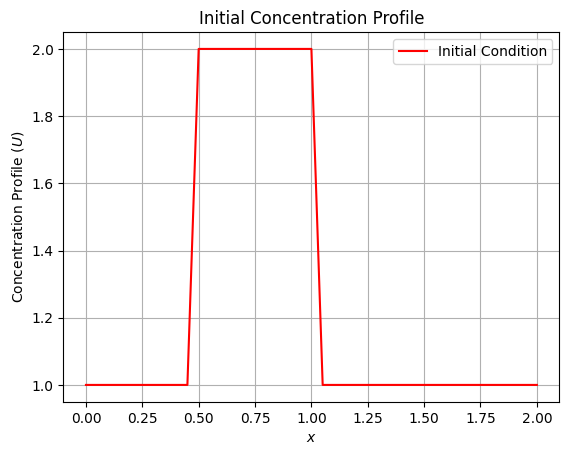

In [4]:
# Plot the initial concentration profile
plt.plot(x_hat, u_hat, label='Initial Condition', color='red')
plt.xlabel('$x$')
plt.ylabel("Concentration Profile ($U$)")
plt.title('Initial Concentration Profile')
plt.legend()
plt.grid()

Why doesn't the hat function have perfectly straight sides? Think for a bit.

__Answer:__<br>
Because of the discretization of the grid points due to the large size of $dx$. As a result, the change in $u$ appears "stepped" rather than perfectly vertical line as the plot interpolates between these discrete values.

Now we implement the discretization of the convection equation using a finite-difference scheme. For every element i of our array $U^{n}_i$ we need to perform the operation define above ($U^{n+1}_i$).  We'll store the result in a new (temporary) array Un, which will be the next state of U  for the next time-step. We will repeat this operation for as many time-steps as we specify and then we can see how far the concentration profile has convected.

We will need also boundary conditions, so for the moment we will only use periodic boundary conditions (what leaves from the right, re-enters at the left)

 The code's structure is the following :
 
 1) define U at time =0, dt, dx, c etc...
 
 2) compute Un as a function of U and all other information.
 
 3) Take care of boundary conditions at the edges  (use periodic boundary conditions on X)
 
 4) Time=Time+dt
 
 5) go back to 2
 

Boundary conditions: Explain how you compute the first and last point of the grid (i=0 and i=N)<br>
```Note: We think as the first point started from i = 0, the last point might be i = N-1 rather than i = N```

__Answer:__
- For the first point (`i=0`), the value is computed using the value at the last point (`i=N-1`).
- For the last point (`i=N-1`), the value is computed using the value at the first point (`i=0`).

In this way, the value leaving the domain at one boundary re-enters from the opposite boundary, creating a continuous loop.


Write the code...

In [5]:
def plot_concentration_at_times(time_steps):
    '''We have used this function because on the next question, we are asked to plot the graphs for
    different time steps and we want to show the graphs in the next code block.
    '''
    # Initialize 'u' each time the function runs
    u = u_hat.copy()
    # Create a copy of u to hold the updated values for the next time step
    u_new = u.copy()

    # Time-stepping loop to compute U^{n+1}_i
    Time = 0.0  # Initialize time
    for n in range(nt):
        # 2) Compute Un (temporary array for the next time step)
        u_new = u.copy() # alternatively - > u_new[:] = u[:]  # Copy current u values to u_new for next time step

        # Loop over spatial points and compute U^{n+1}_i using the finite difference scheme
        for i in range(1,nx):  # Loop over spatial points (excluding i=0)
            u[i] = u_new[i] - (c * dt / dx) * (u_new[i] - u_new[i - 1])

        # Apply periodic boundary conditions
        u[0] = u_new[0] - (c * dt / dx) * (u_new[0] - u_new[-1])  # Periodic boundary at x=0

        # 3) Update time: Time = Time + dt
        Time += dt

        # 4) Plot the solution at specified time steps
        if n + 1 in time_steps:  # Check if current step is in the time_steps list
            plt.plot(x_hat, u, label=f'Time = {Time:.5f}s')

    # Final plot setup
    plt.title(f'Solution at Time Steps {time_steps}')
    plt.xlabel('$x$')
    plt.ylabel("Concentration Profile ($U$)")
    plt.legend(loc="upper left")
    plt.grid()
    plt.tight_layout(pad=0.1)

Plot U at different times: 3 time steps, 12 time steps, 25 time steps

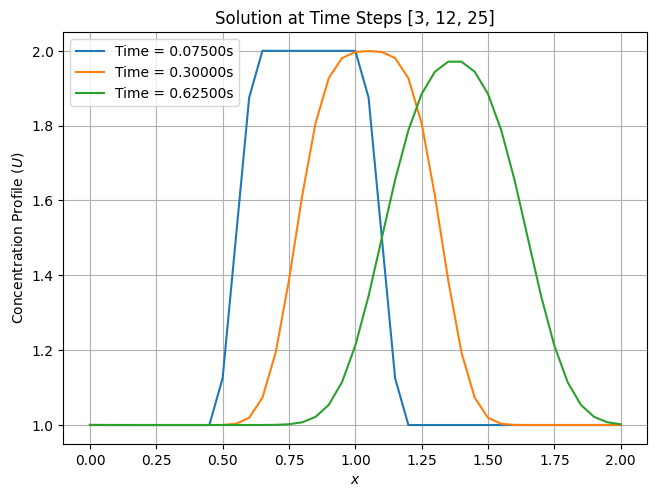

In [6]:
# Plot at time steps 3, 12, and 25
plot_concentration_at_times(time_steps = [3,12,25])

What do you notice ? comment on what you see.

__Answer:__<br>
The concentration profile moves from left to right and almost maintains its overall shape. The plot visually confirms that the convection equation with periodic boundary conditions transports the concentration profile.

What is the value of CFL=dt C / dx ? 

__Answer:__ <br>
The given values are - <br>
$dt =0.025$, $c =1$, and $dx = 0.05$.
Substituting these values into the above equation, we get -<br>
$CFL = \frac{1\times0.025}{0.05} = 0.5$

In [7]:
print("the value of CFL is: ", (dt*c)/dx)

the value of CFL is:  0.5


Redo the same computation, vayring dt , for CFL>1. and CFL << 1

In [8]:
def plot_concentration_at_times_for_CFL(CFL,time_steps):
    dt = (CFL * dx)/c
    # Initialize 'u' each time the function runs
    u = u_hat.copy()
    # Create a copy of u to hold the updated values for the next time step
    u_new = u.copy()

    # Time-stepping loop to compute U^{n+1}_i
    Time = 0.0  # Initialize time
    for n in range(nt):
        # 2) Compute Un (temporary array for the next time step)
        u_new = u.copy() # alternatively - > u_new[:] = u[:]  # Copy current u values to u_new for next time step

        # Loop over spatial points and compute U^{n+1}_i using the finite difference scheme
        for i in range(1, nx):  # Loop over spatial points (excluding i=0)
            u[i] = u_new[i] - (c * dt / dx) * (u_new[i] - u_new[i - 1])

        # Apply periodic boundary conditions
        u[0] = u_new[0] - (c * dt / dx) * (u_new[0] - u_new[-1])  # Periodic boundary at x=0

        # 3) Update time: Time = Time + dt
        Time += dt

        # 4) Plot the solution at specified time steps
        if n + 1 in time_steps:  # Check if current step is in the time_steps list
            plt.plot(x_hat, u, label=f'Time = {Time:.5f}s')

    # Final plot setup
    plt.title(f'Solution at Time Steps {time_steps}')
    plt.xlabel('$x$')
    plt.ylabel("Concentration Profile ($U$)")
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout(pad=0.5)

    
    

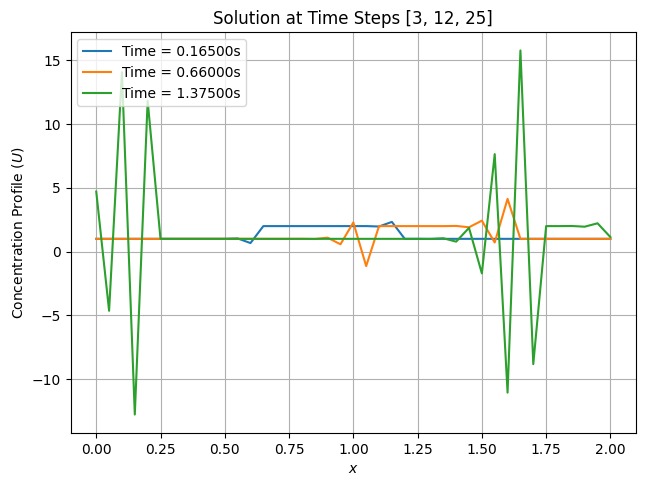

In [9]:
# For CFL > 1
# Plot at time steps 3, 12, and 25
plot_concentration_at_times_for_CFL(
    CFL  = 1.1,
    time_steps=[3, 12, 25]
                                    )  

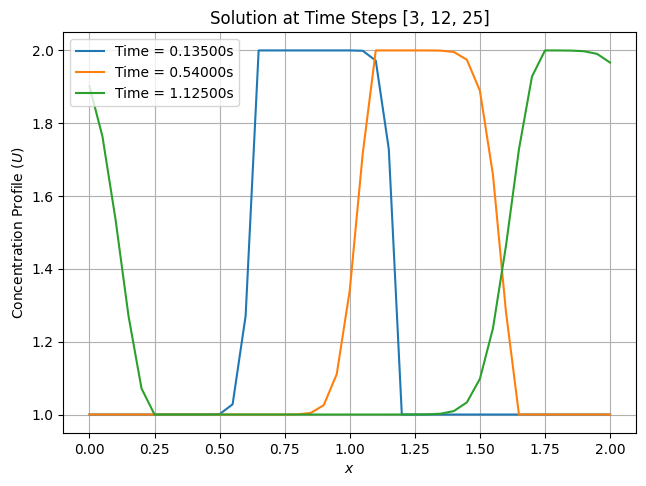

In [10]:
# For CFL < 1
# Plot at time steps 3, 12, and 25
plot_concentration_at_times_for_CFL(
    CFL = 0.9,
    time_steps = [3, 12, 25]       )  

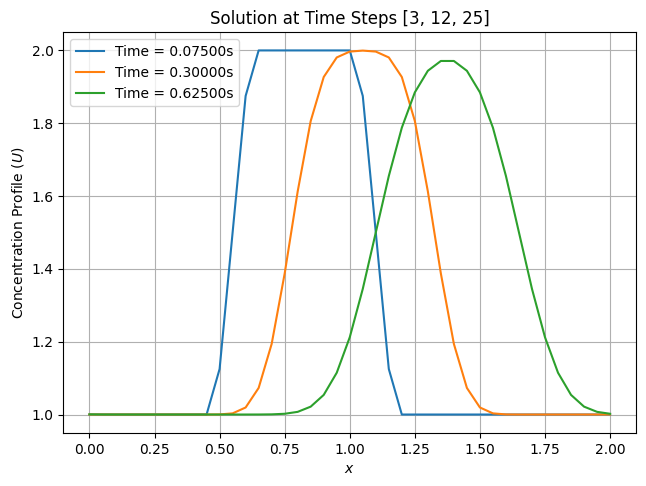

In [11]:
# For CFL = 0.5
# Plot at time steps 3, 12, and 25
plot_concentration_at_times_for_CFL(
    CFL = 0.5,
    time_steps = [3, 12, 25]
)  

What do you notice ? What is the the good integration conditions ?

__Answer:__<br>
For $CFL > 1$, the solution are unstable.<br>
For $CFL << 1$, the solution is more stable retaining the shape of the hat function.

Now redo the computation, with CFL>1 and using an initial U that is gaussian.

In [12]:
# Code for the Gaussian Function
# define the Gaussian Function
x_gauss = np.linspace(0,2,500) #here we increase the number of the grid (nx values = 500) to get a smooth symmetric ( for (0,2) range) Gaussian curve. 
u_gauss = (1/(np.sqrt(2*np.pi)))*np.exp(-((x_gauss - 1) ** 2)/2)  # Gaussian function centered at x = 1
def plot_concentration_of_gaussian_at_times_for_CFL_1(CFL,time_steps):
    dt = (CFL * dx)/c
    # Initialize 'u' each time the function runs
    u = u_gauss.copy()
    # Create a copy of u to hold the updated values for the next time step
    u_new = u.copy()

    # Time-stepping loop to compute U^{n+1}_i
    Time = 0.0  # Initialize time
    for n in range(nt):
        # 2) Compute Un (temporary array for the next time step)
        u_new = u.copy() # alternatively - > u_new[:] = u[:]  # Copy current u values to u_new for next time step

        # Loop over spatial points and compute U^{n+1}_i using the finite difference scheme
        for i in range(1, nx):  # Loop over spatial points (excluding i=0)
            u[i] = u_new[i] - (c * dt / dx) * (u_new[i] - u_new[i - 1])

        # Apply periodic boundary conditions
        u[0] = u_new[0] - (c * dt / dx) * (u_new[0] - u_new[-1])  # Periodic boundary at x=0

        # 3) Update time: Time = Time + dt
        Time += dt

        # 4) Plot the solution at specified time steps
        if n + 1 in time_steps:  # Check if current step is in the time_steps list
            plt.plot(x_gauss, u, label=f'Time = {Time:.5f}s')

    # Final plot setup
    plt.title(f'Solution at Time Steps {time_steps}')
    plt.xlabel('$x$')
    plt.ylabel("Concentration Profile ($U$)")
    # plt.ylim(0.2,0.45)
    plt.legend()
    plt.grid()
    
    

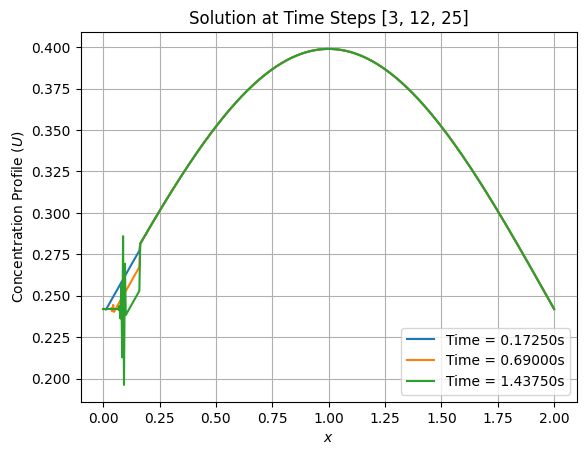

In [13]:
plot_concentration_of_gaussian_at_times_for_CFL_1(
    CFL = 1.15,
    time_steps = [3,12,25])

What do you notice ?

__Answer:__<br>
For $CFL > 1$, we observe a Gaussian curve with distortion in the left end side due to the solution's instability.

 Redo the same thing using a 2nd order accuracy expression for the space derivative, and 1st order accuracy expression for the time derivative like leap frog.

What is the new integration scheme ?


__Answer:__<br>
The new integration scheme is the __Leapfrog method__, which uses a 2nd-order accurate central difference in space derivative and 1st-order in time derivative to update the solution. It computes:
<div align="center">
$u_i^{n+1} = u_i^{n} - \frac{\sigma}{2} \cdot (u_{i+1}^n - u_{i-1}^n)$, where $\sigma = \frac{cdt}{dx}$</div>
with periodic boundary conditions.


Write your new code and do a try with CFL=0.5

In [14]:
def plot_concentration_of_hat_using_leap_frog(CFL,time_steps):
    dt = (CFL * dx)/c
    # Initialize 'u' each time the function runs
    u = u_hat.copy()
    # Create a copy of u to hold the updated values for the next time step
    u_new = u.copy()

    # Time-stepping loop to compute U^{n+1}_i
    Time = 0.0  # Initialize time
    for n in range(nt):
        # 2) Compute Un (temporary array for the next time step)
        u_new = u.copy() # alternatively - > u_new[:] = u[:]  # Copy current u values to u_new for next time step

        # Loop over spatial points and compute U^{n+1}_i using the central difference scheme
        for i in range(1, nx):  # Loop over spatial points (excluding i=0)
            u[i] = u_new[i] - (c * dt)/(2 * dx) * (u_new[(i+1) % nx] - u_new[i - 1])

        # Apply periodic boundary conditions
        u[0] = u_new[0] - (c * dt / dx) * (u_new[1] - u_new[-1])  # Periodic boundary at x=0

        # 3) Update time: Time = Time + dt
        Time += dt

        # 4) Plot the solution at specified time steps
        if n + 1 in time_steps:  # Check if current step is in the time_steps list
            plt.plot(x_hat, u, label=f'Time = {Time:.5f}s')

    # Final plot setup
    plt.title(f'Solution at Time Steps {time_steps}')
    plt.xlabel('$x$')
    plt.ylabel("Concentration Profile ($U$)")
    plt.legend()
    plt.grid()
    
    

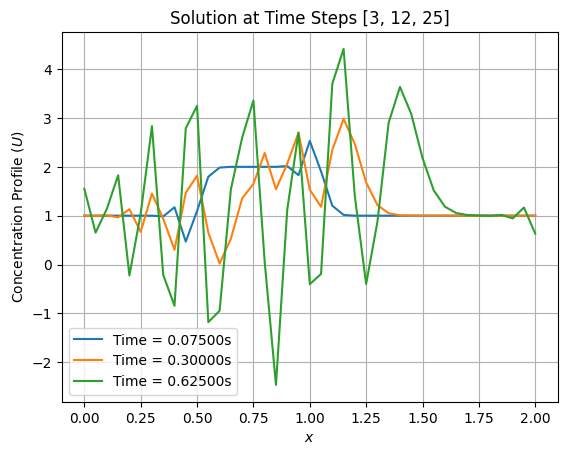

In [15]:
plot_concentration_of_hat_using_leap_frog(
    0.5, # cfl
    [3,12,25] #time-steps
)

In [16]:
# Code for the Gaussian Function
def plot_concentration_of_gaussian_using_leap_frog(CFL,time_steps):
    # Initialize 'u' each time the function runs
    u = u_gauss.copy()
    # Create a copy of u to hold the updated values for the next time step
    u_new = u.copy()

    # Time-stepping loop to compute U^{n+1}_i
    Time = 0.0  # Initialize time
    for n in range(nt):
        # 2) Compute Un (temporary array for the next time step)
        u_new = u.copy() # alternatively - > u_new[:] = u[:]  # Copy current u values to u_new for next time step

        # Loop over spatial points and compute U^{n+1}_i using the central difference scheme
        for i in range(1, nx):  # Loop over spatial points (excluding i=0)
            u[i] = u_new[i] - (c * dt / dx) * (u_new[(i+1) % nx] - u_new[i - 1])

        # Apply periodic boundary conditions
        u[0] = u_new[0] - (c * dt)/(2 * dx) * (u_new[1] - u_new[-1])  # Periodic boundary at x=0

        # 3) Update time: Time = Time + dt
        Time += dt

        # 4) Plot the solution at specified time steps
        if n + 1 in time_steps:  # Check if current step is in the time_steps list
            plt.plot(x_gauss, u, label=f'Time = {Time:.5f}s')

    # Final plot setup
    plt.title(f'Solution at Time Steps {time_steps}')
    plt.xlabel('$x$')
    plt.ylabel("Concentration Profile ($U$)")
    plt.ylim(0.2, 0.45)
    plt.legend()
    plt.grid()
    
    

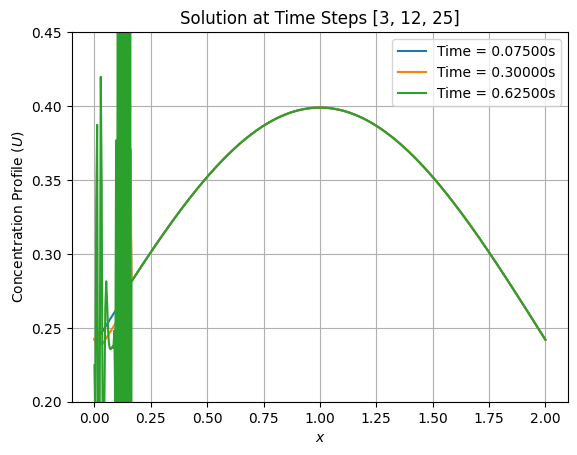

In [17]:
plot_concentration_of_gaussian_using_leap_frog(
    CFL=0.5, 
    time_steps=[3, 12, 25]
)


Comment ?

__Answer:__<br>
At the starting (left side), the Leap-frog shows distortion for $CFL = 0.5$. We have checked this method for different value of $CFL$ and observe that the solution remains the same.
However, for the Hat function, the solution changes (distorted) with different values of $CFL$.